## Os impactos do suicídio na pandemia

**Grupo**:
- Ana Beatriz Oliveira de Macedo
- Andson Andre da Silva Ribeiro 
- Bruna Bellini Faria
- Lucca Cerf Costa
- Thiago Rodrigues de Jesus Carvalho

**Matéria**:

Projeto integrado: Storytelling

### Instalações

In [62]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install plotly
!pip3 install numpy
!pip3 install folium
!pip3 install wordcloud
!pip3 install bs4
!pip3 install openpyxl
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 

You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import folium
import plotly.express as px
import datetime
import re

#### Análise de palavras postadas no Twitter

Nesta análise se encontram três WordClouds, ou seja, três nuvens de palavras que englobam palavras encontradas em diversos tweets publicados por usuários e coletados em um site chamado "Workbench", este site coleta até 3000 postagens do conteúdo buscado. 

O primeiro WordCloud foi resultado de uma pesquisa das frases “não aguento mais” e “não posso mais viver” por todo o Twitter em português, já o segundo foi resultado da busca pela palavra  “suicídio” nas postagens e o terceiro foi por meio da busca das palavras “suicida” e “suicidar”. Com isso, notamos por meio da visualização das imagens que todos possuem palavras fortes que são compartilhadas diariamente nesta rede social, o essêncial para nós foi observar o quanto é importante para diversas pessoas conversar ou expor sua situação de uma maneira anônima ou não, as palavras mostram uma mistura de últimas despedidas, pedidos de ajuda, relatos de experiências, ofertas de apoio. Ademais, tudo isto mostra a essência por trás do Twitter, seja para o bem ou para o mal, dentro da análise existe um pequeno padrão de ajuda e suporte nos posts fornecido pelos usuários, mas também um padrão de experiências, motivos e desentendimentos, que mostram que pessoas precisam de um espaço para se expressar para relatar, conversar, se expressar e muito mais.

Importando os dados

In [23]:
# WordCloud 1

twitter_NAM =pd.read_csv(r'./Data/twitter_1.csv', sep=',')

#Limpando os dados, retirando colunas desnecessárias
twitter_NAM= twitter_NAM.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_NAM.columns.values[0]= 'Usuário'
twitter_NAM.columns.values[1]= 'Data de postagem'
twitter_NAM.columns.values[2]= 'Texto'

#twitter_NAM.info()
twitter_NAM.head(8)

,Usuário,Data de postagem,Texto
0,cherrywrxs,2021-05-10T19:07:55Z,RT @aslion: tou tão desinteressada últimamente...
1,pipoca_sep,2021-05-10T18:43:03Z,"Cortei a franja da Anna, ela se mexeu, ficou t..."
2,MathKavalcante,2021-05-10T18:20:18Z,RT @aslion: tou tão desinteressada últimamente...
3,Madame_Cosett,2021-05-10T18:11:56Z,RT @aslion: tou tão desinteressada últimamente...
4,Visatotn,2021-05-10T18:04:15Z,eu. não. consigo. mais. viver. nesse. país. te...
5,H3LBERTGE0RGE,2021-05-10T17:29:04Z,que ódiokk\n\n@DynaRiotS2 @Mushro0mBoy bora en...
6,Lailapadua4,2021-05-10T17:20:31Z,@alarissamatos Já não consigo nem viver direit...
7,mary_sozzo,2021-05-10T17:12:28Z,Minha mente é um turbilhão mais eu consigo viv...


In [24]:
# WordCloud 2

twitter_SD =pd.read_csv(r'./Data/twitter_2.csv', sep=',')

twitter_SD= twitter_SD.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SD.columns.values[0]= 'Usuário'
twitter_SD.columns.values[1]= 'Data de postagem'
twitter_SD.columns.values[2]= 'Texto'

#twitter_SD.info()
twitter_SD.head(8)

,Usuário,Data de postagem,Texto
0,bibi98209150,2021-05-11T21:37:40Z,@svenusblack @odiar_homem @beyangeI ta rindo p...
1,_Capela5,2021-05-11T21:21:59Z,Já tinha aqui umas mensagens para ajudar pesso...
2,Oxe_imp,2021-05-11T21:14:45Z,@guarana @elleir_cs @oocbrazil Eu vou suicidar...
3,marquesa22_,2021-05-11T21:12:47Z,"@brunamsss Amiga, o filme viajou demais na mai..."
4,louispiola2,2021-05-11T21:11:29Z,@Killmyalma me queiro matar balear morir suicidar
5,DjGeanSilvaa,2021-05-11T20:57:17Z,"RT @biianbjb: gente, eu quero de fato me suici..."
6,littlejezz,2021-05-11T20:46:34Z,"Tirando a última parte da conversa, isso me le..."
7,patriciaob13,2021-05-11T20:44:20Z,Eu repito pra mim mesma q n tem nd q eu n ague...


In [25]:
# WordCloud 3

twitter_SC =pd.read_csv(r'./Data/twitter_3.csv', sep=',')

twitter_SC= twitter_SC.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SC.columns.values[0]= 'Usuário'
twitter_SC.columns.values[1]= 'Data de postagem'
twitter_SC.columns.values[2]= 'Texto'

#twitter_SC.info()
twitter_SC.head(8)

,Usuário,Data de postagem,Texto
0,yleunameem,2021-05-10T22:33:13Z,coragem pra cometer suicídio só queria isso
1,__bieela,2021-05-10T22:33:08Z,Já te falei vida do crime é suicidio lento
2,marieamts,2021-05-10T22:33:03Z,RT @nacarulyna: nao ironicamente suicídio es...
3,jungkookincel,2021-05-10T22:32:52Z,RT @gatinhopodre: opiniao que provavelmente va...
4,sarafonseca1893,2021-05-10T22:32:43Z,RT @ruuelmaa: Nem consigo imaginar o tamanho d...
5,peachjjinie,2021-05-10T22:32:38Z,RT @mafleurjk: ⚠️ prevenção de suicídio ⚠️\r\n...
6,ifsfairy,2021-05-10T22:32:25Z,tw // suicídio\r\n.\r\n.\r\n.\r\n.\r\n.\r\n.\r...
7,padeiiroo2,2021-05-10T22:32:25Z,@_haime_souza unica coisa impedindo meu suicid...


Gerando os WordClouds

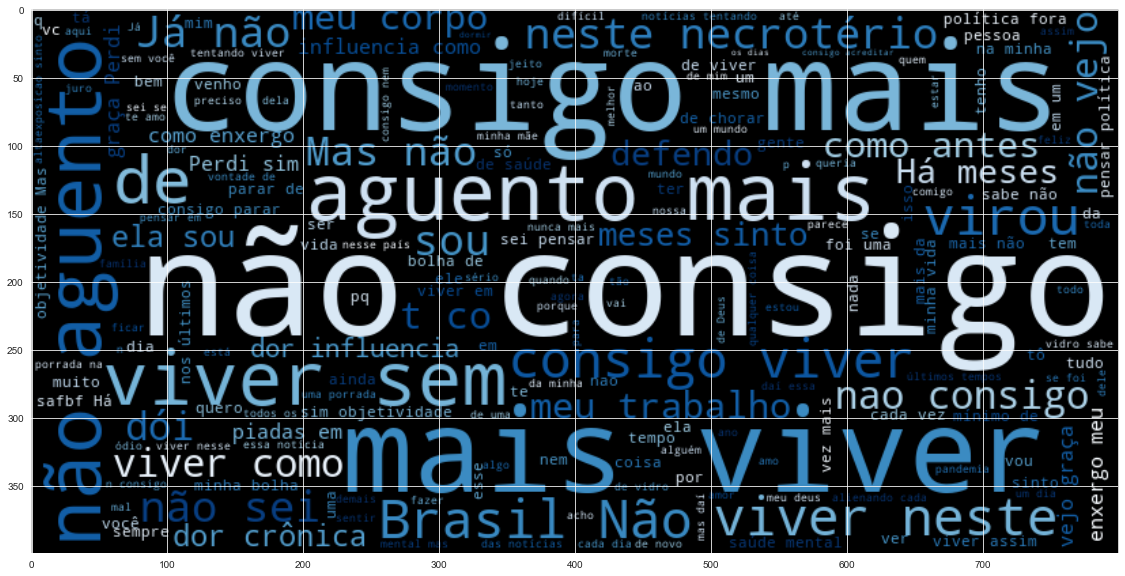

In [26]:
# WordCloud 1

# Texto com todas as palavras que a coluna 'Texto'
text = " ".join(review for review in twitter_NAM.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

# Criando stopwords paera remover as palavras indesejadas
stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "e", "pra", "o", "que", "t: co", "e ela", "paulo gustavo", "https", "Bolsonaro", "é", "veiadoscausos", "t  co", "Eu", "gustavo", "paulo  gustavo", "paulo"])

# Gerando a imagem da word cloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

# Exibição da imagem gerada pelo matplotlib 
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

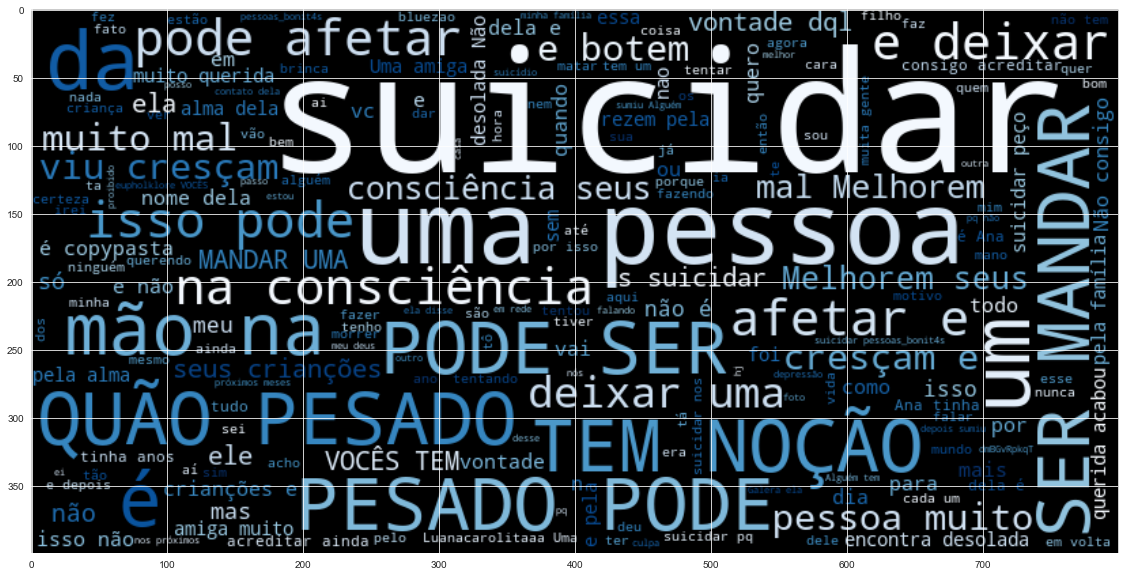

In [27]:
# WordCloud 2

text = " ".join(review for review in twitter_SD.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "porra", "imbecis", "Ldivino_ribeiro", " porra ", "que", "pra"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

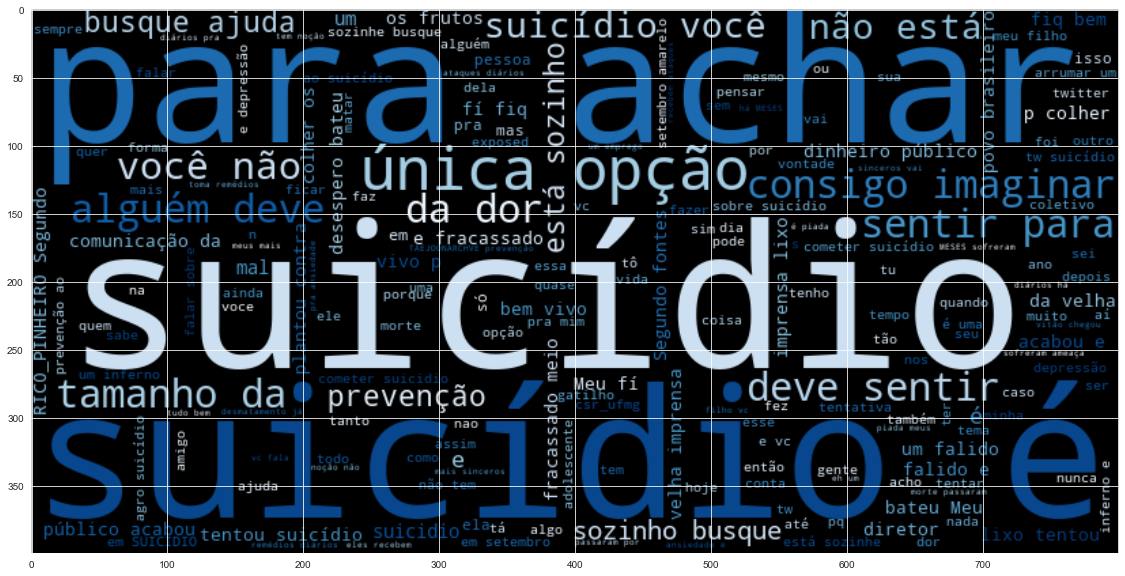

In [28]:
# WordCloud 3

text = " ".join(review for review in twitter_SC.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "ruuelmaa", "Nem", "NuXfIsTwjc", "byangells", "fuder", "whindersson", "mamata", "luisa", "RICO_PINHEIRO", "EstadaoFake", "que"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Análise dos relatórios mensais do CVV (Centro de Valorização a Vida)

Lendo os dados dos relatórios mensais do CVV, observamos que haviam aspectos essenciais para analisar e gerar um conhecimento maior para nossa pesquisa, os número de ligações atendidas e perdidas, os número de ligação por cada região do Brasil, o tempo médio das ligação atendidas e a maneira de realização do atendimento, sendo remoto ou físico, todos essenciais para certo entendimento. 

O gráfico 1 mostra o volume de ligações atendidas no Brasil há cada mês, e foi um choque para nós vermos que mais de 210 mil pessoas procuram por atendimento e tem sucesso, isso pode parecer pouco observando toda a população brasileira, porám devemos considerar que são mais de 210 mil pessoas pedindo ajuda para estranhos porque não conseguem ou não tem uma pessoa proxíma para pedir ajuda, todas essas pedem assistência por ligação, então imagine quantas não pedem por email, pelo chat, ou mesmo quantas não tem suas ligações atendidas como mostra o 2 gráfico, pois bem agora os números já parecem maiores não?, mas ainda não acabou pois diversos indivíduos não chegam a pedir ajuda seja por um bloquio pessoal, por falta de acesso, ou até mesmo pelo medo de srem julgados de alguma forma. O tabu que a sociedade impõe no tema do suicídio vem corrompendo indivíduos com o medo de serem julgados, mas se ao menos a população soubesse que basta de 7 a 9 minutos para dar assistência a alguém que necessita, segundo o gráfico 3, e todos falassem mais abertamente sobre o assunto, talvez este tabu diminuisse ou fosse tão pequeno que passaria despercebido. 

A curiosidade sobre as mudanças desses atendimentos na pandêmia nos foi despertada e decidimos por análisar a taxa de atendimentos fisícos e remotos no periodo de entrada da pandemia e durante, foi interresante notar no gráfico 4 que antes a ida ao local era o meio mais utilizado pelos usuários, mas com a entrada da pandemia o método remoto foi tomando conta e com isso a demanda maior de profissionais tecnologicamente capacitados, afinal o CVV não só atende por telefone, mas segundo seu site oficial, podem ser trocadas mensagens, emails e ligações por vídeo. O pico de ligações perdidas em Novembro de 2020, no gráfico 3, foi época de iniciação dos treinamentos para interresados em ajudar o centro, depois elas voltam a ser mais baixas, mas ainda assim com números altos, é nessa parte que entramos com a ideia de fornecer uma colaboração, uma ajuda diferente para quem está precisando e não está conseguindo neste momento tão tenso e frustante para todos. Aqueles que sentem a necessidade de ir ao local fisicamente demonstram para nossa analise que sabem seu nível de preocupação e que tenativas remotas não são suficientes, mas para aqueles que o remoto está sendo suficiente, imagine se esses pudessem ao ínves ou além de usar o CVV, utilizar da cooperação e suporte de seus entes proxímos de uma maneira simples, mas eficaz.
    

Importando os dados

In [29]:
# Gráficos

colunas = ["mes", "ano", "vla", "vlp", "ar", "af", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba"]
dados= pd.read_csv('./Data/CVV_analise.csv', sep=";", header=0, names=colunas)
dados.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525


In [30]:
# Gráficos 

def converter_tempo_numero(x):
    return int(x[3:5]) + int(x[6:8])/60
    
dados['mt'] = dados.mtp.apply(converter_tempo_numero)

In [31]:
# Gráficos

dados["mes_ano"] = dados["ano"].apply(int)
dados["mes_ano"] = dados["mes_ano"].apply(str)
dados["mes_ano"] = dados["mes"] + " " + dados["mes_ano"]
dados.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba,mt,mes_ano
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633,6.733333,Janeiro 2020
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570,6.800000,Fevereiro 2020
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996,7.183333,Março 2020
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614,7.233333,Abril 2020
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103,7.733333,Maio 2020
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466,7.766667,Junho 2020
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897,7.716667,Julho 2020
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525,7.166667,Agosto 2020


In [33]:
# Gráfico 4

atendimento = dados.drop(["mes", "ano", "vla", "vlp", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba", "mt"], axis = 1)
atendimento.dropna(inplace=True)
atendimento.head(8)

,ar,af,mes_ano
0,27819,283897,Janeiro 2020
1,22627,260760,Fevereiro 2020
2,41438,213860,Março 2020
3,151672,90856,Abril 2020
4,156779,76151,Maio 2020
5,148352,71252,Junho 2020
6,157988,75937,Julho 2020
7,173893,85026,Agosto 2020


In [32]:
# Gráfico 5

cidades = dados.drop(['mes','ano','vla','vlp','ar','af','mtp', 'mt'], axis = 1)
cidades.head(8)

,nsp,nrj,nmg,nrs,npe,npr,nba,mes_ano
0,88545,38875,36803,40858,20153,11846,12633,Janeiro 2020
1,75267,34067,33565,33160,21350,11529,14570,Fevereiro 2020
2,77484,32909,29863,29029,18684,12797,14996,Março 2020
3,74228,30847,30187,25305,25305,11727,14614,Abril 2020
4,67817,29831,28306,25871,16572,11892,13103,Maio 2020
5,68229,26277,24833,24595,15312,12472,12466,Junho 2020
6,77131,29349,26735,26212,13286,13755,12897,Julho 2020
7,81909,28007,28676,31043,15708,15809,17525,Agosto 2020


Gerando os gráficos

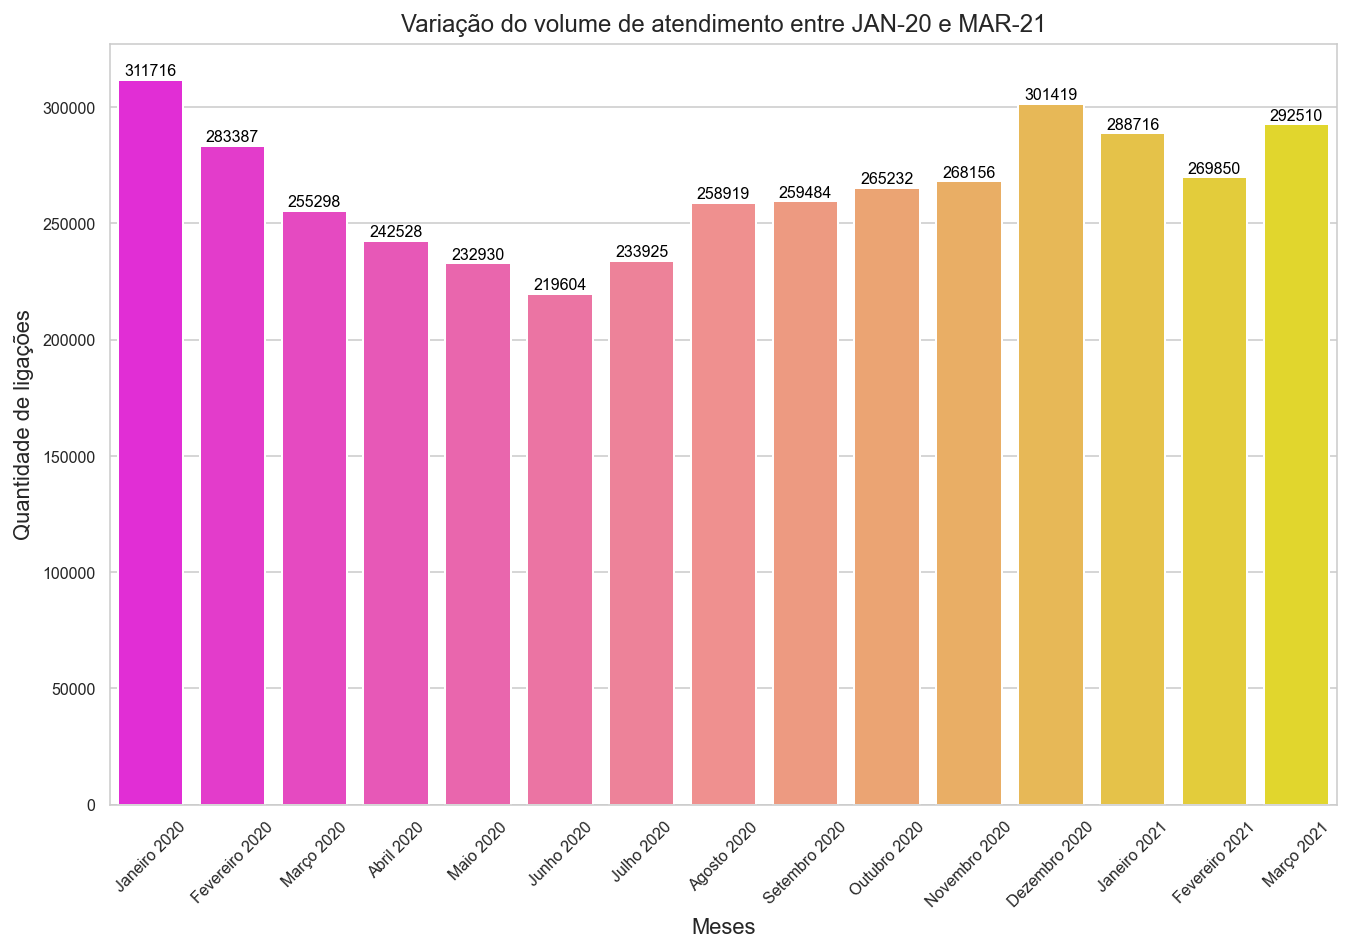

In [190]:
# Gráfico 1

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vla", errwidth=0, palette= 'spring')
ax.set_title('Variação do volume de atendimento entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

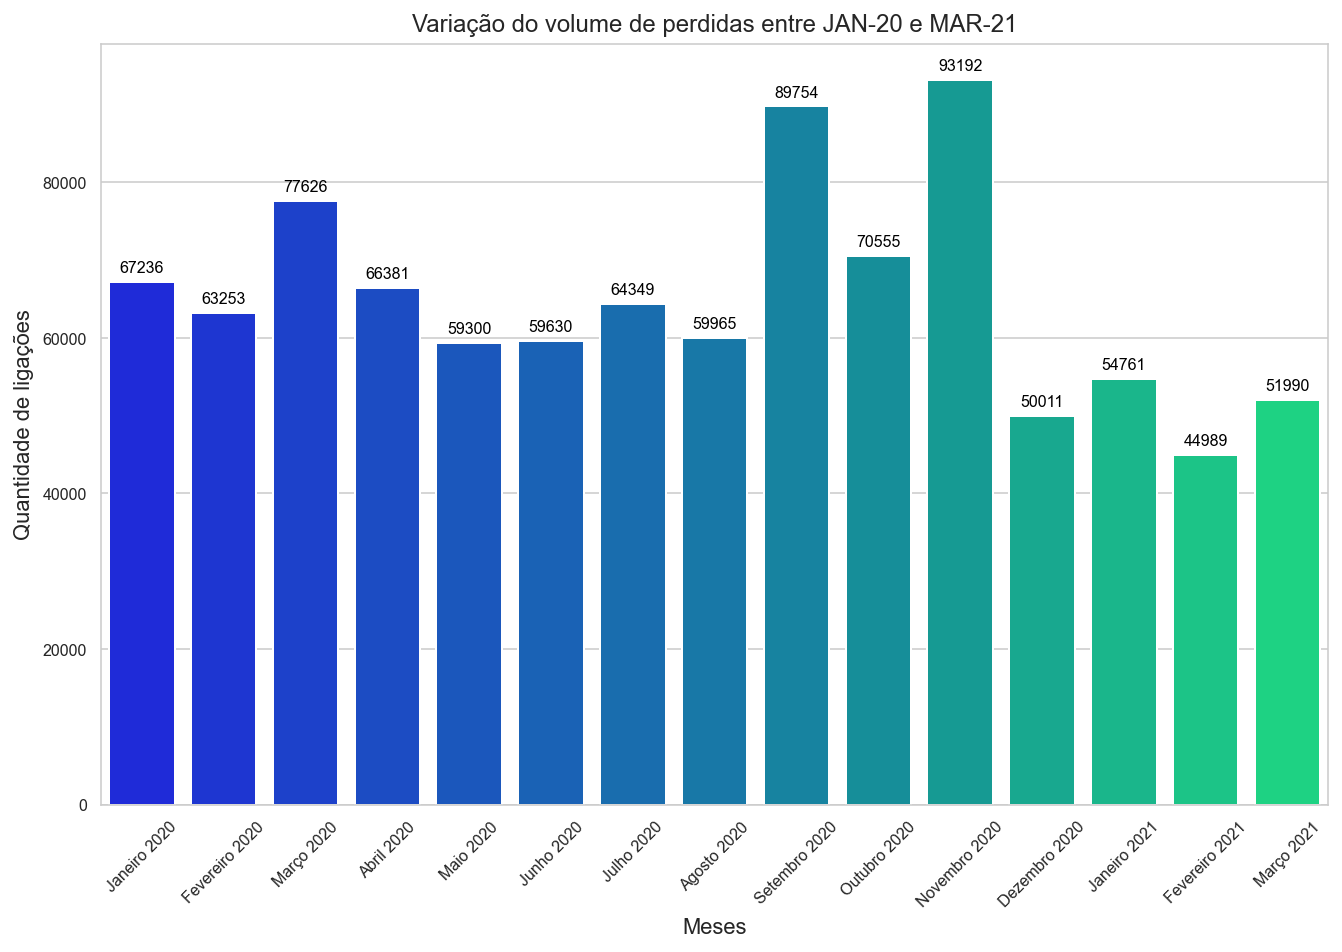

In [189]:
# Gráfico 2

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vlp", errwidth=0, palette='winter')
ax.set_title('Variação do volume de perdidas entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

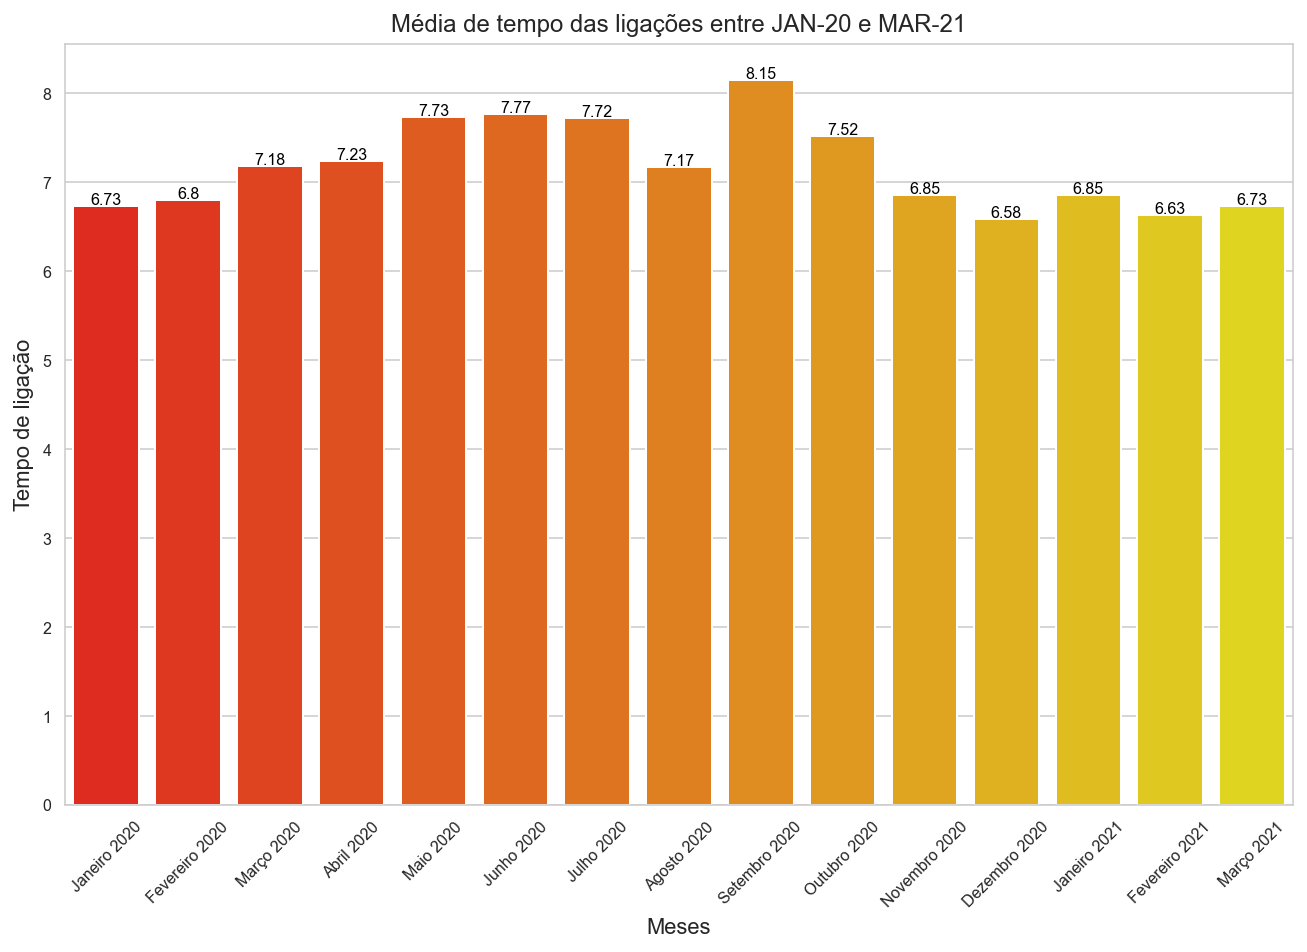

In [188]:
# Gráfico 3

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "mt", errwidth=0, palette= 'autumn')
ax.set_title('Média de tempo das ligações entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Tempo de ligação', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(round(i.get_height(),2), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

In [186]:
# Gráfico 4

graf1 = go.Bar(x=atendimento['mes_ano'], y=atendimento["af"], name = 'Físico', marker = {'color': '#00ced1'})
graf2 = go.Bar(x=atendimento['mes_ano'], y=atendimento["ar"], name = 'Remoto', marker = {'color': '#fa8072'})
data = [graf1, graf2]
layout = go.Layout(title='Classificação dos atendimentos entre JAN-20 e MAR-21',
                   yaxis={'title':'Quantidade de atendimentos'},
                   xaxis={'title': 'Meses'},
                   barmode="stack", height=600, width=1000)
fig = go.Figure(data= data, layout=layout)                
py.iplot(fig)

In [59]:
# Gráfico 5 

SP= go.Scatter(x=dados['mes_ano'], y=dados3,['nsp'],
                    mode='lines+markers',
                    name='SP', line = dict(color='deeppink', width=2))
RJ= go.Scatter(x=dados['mes_ano'], y=dados['nrj'],
                    mode='lines+markers',
                    name='RJ', line = dict(color='darkorange', width=2))
MG= go.Scatter(x=dados['mes_ano'], y=dados['nmg'],
                    mode='lines+markers',
                    name='MG', line = dict(color='purple', width=2))                    
RS= go.Scatter(x=dados['mes_ano'], y=dados['nrs'],
                    mode='lines+markers',
                    name='RS', line = dict(color='deepskyblue', width=2))
PE= go.Scatter(x=dados['mes_ano'], y=dados['npe'],
                    mode='lines+markers',
                    name='PE', line = dict(color='limegreen', width=2))
PR= go.Scatter(x=dados['mes_ano'], y=dados['npr'],
                    mode='lines+markers',
                    name='PR', line = dict(color='yellow', width=2))
BA= go.Scatter(x=dados['mes_ano'], y=dados['nba'],
                    mode='lines+markers',
                    name='BA', line = dict(color='gray', width=2))
data= [SP, RJ, MG, RS]
layout= go.Layout(title={
                    'text' : 'Número de ligações por região entre JAN-20 e MAR-21',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Meses', 'tickangle' : 45},
                   legend_title="Regiões:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-59-ba3d988cde07>, line 5)

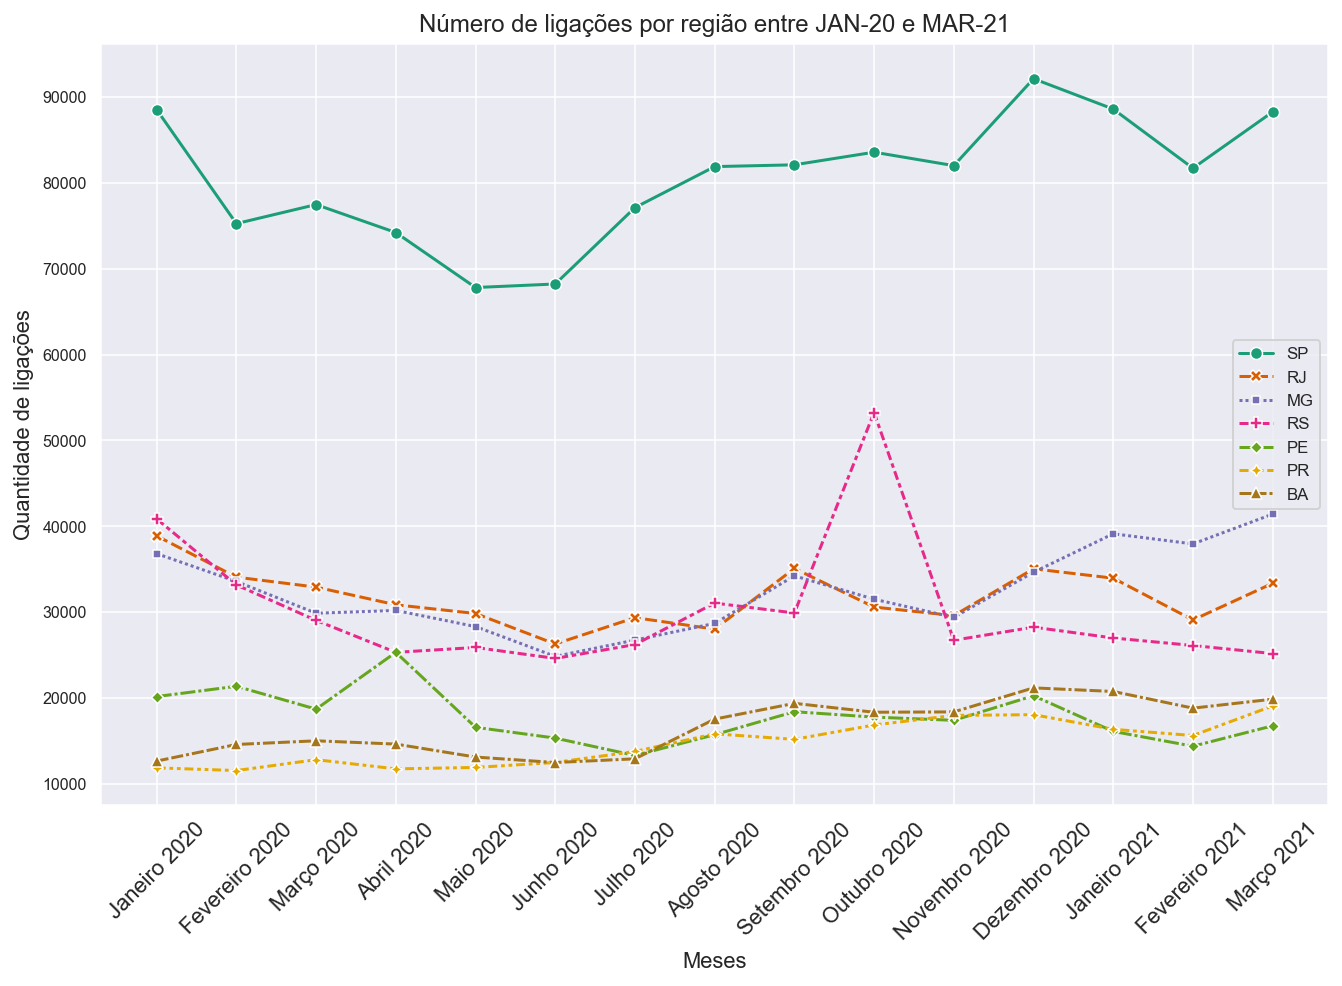

In [187]:
# Gráfico 5

sns.set_style('darkgrid')
plt.title('Número de ligações por região entre JAN-20 e MAR-21')
ax = sns.lineplot(data = cidades, palette='Dark2', markers=True, legend= False)
plt.legend(loc= 'center right', labels= ['SP', 'RJ', 'MG', 'RS', 'PE', 'PR', 'BA', 'X'], fontsize= 8.4)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,15))))
ax.set_xticklabels(cidades['mes_ano'])
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], rotation=45, fontsize=11)
plt.gcf().set_size_inches(11, 7)
plt.show()

#### Análise do Google trends na busca por suicídio

DESCREVER A IMPORTANCIA E A ANÁLISE

Importando os dados

In [64]:
# Gráfico 1

colunas = ['semana_2020', 'porcentagem_2020', 'semana_2019', 'porcentagem_2019']
suicide_searches = pd.read_csv(r'./Data/multiTimeline.csv', sep=',', header=0, names=colunas)

#suicide_searches.info()
suicide_searches.head(8)

,semana_2020,porcentagem_2020,semana_2019,porcentagem_2019
0,2020-01-05,53,2019-01-06,52
1,2020-01-12,50,2019-01-13,50
2,2020-01-19,53,2019-01-20,50
3,2020-01-26,51,2019-01-27,49
4,2020-02-02,49,2019-02-03,67
5,2020-02-09,51,2019-02-10,53
6,2020-02-16,63,2019-02-17,56
7,2020-02-23,51,2019-02-24,61


In [65]:
# Gráfico 2

colunas = ['Semana','Japão', 'Brasil', 'Estados Unidos']
bra_eua_jap_searches= pd.read_csv(r'./Data/multiTimeline cópia.csv', sep= ',', header=0, names=colunas)
#bra_eua_jap_searches = bra_eua_jap_searches.drop([0,1], axis=0)

#bra_eua_jap_searches.info()
bra_eua_jap_searches.head(8)

,Semana,Japão,Brasil,Estados Unidos
0,2020-01-05,26,11,13
1,2020-01-12,16,10,15
2,2020-01-19,13,14,16
3,2020-01-26,16,12,15
4,2020-02-02,16,11,15
5,2020-02-09,14,10,15
6,2020-02-16,22,11,17
7,2020-02-23,14,10,15


In [66]:
# Gráfico 3

geo = pd.read_csv("./Data/geoMap.csv", header=0, names=['pais', '2020', '2019'])
geo.dropna(inplace=True)

# geo.info()
geo.head(8)

,pais,2020,2019
0,Japão,58,42
1,Paraguai,38,62
2,Irã,51,49
3,Colômbia,37,63
4,Coreia do Sul,50,50
5,Turquia,44,56
6,Estados Unidos,47,53
7,Brasil,41,59


Gerando os gráficos

In [67]:
# Gráfico 1

ano_20= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2020'],
                    mode='lines+markers',
                    name='2020', line = dict(color='crimson', width=2))
ano_19= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2019'],
                    mode='lines+markers',
                    name='2019', line = dict(color='lightseagreen', width=2))
data= [ano_20, ano_19]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Janeiro até Dezembro de 2019 e 2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Anos:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [69]:
# Gráfico 2

J= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Japão'],
                    mode='lines+markers',
                    name='JAPÃO', line = dict(color='purple', width=2))
B= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Brasil'],
                    mode='lines+markers',
                    name='BRA', line = dict(color='limegreen', width=2))
E= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Estados Unidos'],
                    mode='lines+markers',
                    name='EUA', line = dict(color='darkorange', width=2))
data= [J, B, E]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Países:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [70]:
# Gráfico 3

graf1 = go.Bar(x=geo["pais"], y=geo["2019"], name = '2019', marker = {'color': 'lightseagreen'})
graf2 = go.Bar(x=geo["pais"], y=geo["2020"], name = '2020', marker = {'color': 'crimson'})
data = [graf1, graf2]
layout = go.Layout(title='Comparação de pesquisas sobre suicídio entre 2019 e 2020',
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Países'},
                   barmode="stack",
                   height=600, width=1000)
fig = go.Figure(data=data, layout=layout)                
py.iplot(fig)

In [82]:
# Gráfico 4 

paises=["BRA", "EUA", "JAP", "BEL"]

fig = go.Figure(data=[
    go.Bar(name='2019', x=paises, y=[13520, 47511, 20169, 2098], marker = {'color': 'lightseagreen'}),
    go.Bar(name='2020', x=paises, y=[12256, 44834, 20081, 2656], marker = {'color': 'crimson'})
], layout= layout)
layout = go.Layout(title='Números absolutos de suicídios em quatro Países',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Países'})

fig.update_layout(barmode='group')
fig.show()

### Análise do número de vitímas de suicídio em 2019 e 2020

A importância da análise dos casos de suicídio no Brasil visam um aprofundamento na pesquisa e nas correlações com os outros dados. DESCREVER A IMPORTANCIA E COORELACIONAR OS DADOS E DESCREVER A ANÁLISE

Por fim, observase o gráfico 5, pode parecer inútil para a pesquisa, mas abriu nosso olhos porque muitos sujeitos usam as doenças mentais, o resultado do suicídio justificando que os lugares que mais ocorrem são bairros, cidades, países pouco nobres de situação precária, porém é notório que o gráfico acaba por contradizer está informação, já que o estado de São Paulo se encontra no Ranking de Eficiência dos Municípios da Folha em classificações majoritariamente entre "eficiência" e "alguma eficiência", enquanto o estado do Paraná fica majoritáriamente entre os rótulos de "pouca eficiência" e "ineficiência" (REVER ISSO) (COMPARAR AS LIGAÇÕES COM ONDE TEM MAIS CASOS, TENATM ESTIPULAR RELAÇÃO CON GENERO E COR, TAMBÉM A CLASSIFICAÇÃO DA CIDADE(GRANDE PEQUENA RICA POBRE E ETC))


Importando os dados

In [53]:
# Gráfico 1

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([99, 100, 108, 118, 127, 123])
# display(df)
# df.head(8)

df_2019 = df.loc[ df['data'] == '2019' ]
df_2019.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
101,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,13.0,13.0,17.0,10.0,8.0,10.0,13.0,9.0,12.0,9.0,12.0,14.0,140.0
102,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,8.0,4.0,6.0,6.0,6.0,3.0,5.0,7.0,7.0,3.0,8.0,9.0,72.0
103,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,18.0,17.0,16.0,21.0,23.0,21.0,26.0,24.0,19.0,20.0,23.0,25.0,253.0
104,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,2.0,3.0,8.0,5.0,3.0,2.0,5.0,8.0,6.0,3.0,1.0,4.0,50.0


In [50]:
# Gráfico 2

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([132, 133, 141, 151, 156, 160])
# display(df)
# df.head(8)

df_2020 = df.loc[ df['data'] == '2020*' ]
df_2020.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
134,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,14.0,12.0,11.0,9.0,9.0,13.0,10.0,10.0,13.0,18.0,8.0,10.0,137.0
135,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,7.0,6.0,4.0,8.0,6.0,8.0,3.0,5.0,5.0,7.0,5.0,7.0,71.0
136,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,35.0,23.0,25.0,25.0,30.0,22.0,28.0,18.0,28.0,21.0,26.0,33.0,314.0
137,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,9.0,0.0,2.0,3.0,5.0,3.0,5.0,2.0,3.0,0.0,1.0,2.0,35.0


In [36]:
# Gráfico 1 e 2

def calc_raio(n):
    if (n < 0):
        return 0
    return (int((np.log(n + 1.00001))) + 0.2) * 1000

datas_dic = {}
col_data = df['data']
for data in lst_datas:
    datas_dic[data] = df.loc[col_data == data]

In [113]:
#  Gráfico 3

nome_dataset = './Data/who_suicide_statistics.csv'
df = pd.read_csv(nome_dataset)
dados_país= df.loc[df['country']=='Brazil']
# dados_país

dados_país['Média'] = dados_país['population'] / dados_país['suicides_no']
# dados_país.head(8)

tabelaTudo=dados_país.iloc[[0,1, 2,4,5,6,7,8,10,11,216,217,218,220,221,222,223,224,226,227,432, 433, 434,436,437,438,439,440,442,443,]]
tabelaTudo.head(8)

<ipython-input-113-e538d1d46010>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,year,sex,age,suicides_no,population,Média
6204,Brazil,1979,female,15-24 years,385.0,12448100.0,32332.727273
6205,Brazil,1979,female,25-34 years,227.0,8867900.0,39065.638767
6206,Brazil,1979,female,35-54 years,269.0,10282200.0,38223.791822
6208,Brazil,1979,female,55-74 years,121.0,4678800.0,38667.768595
6209,Brazil,1979,female,75+ years,25.0,790700.0,31628.000000
6210,Brazil,1979,male,15-24 years,568.0,12533100.0,22065.316901
6211,Brazil,1979,male,25-34 years,583.0,8875800.0,15224.356775
6212,Brazil,1979,male,35-54 years,784.0,10234300.0,13053.954082


Gerando o gráfico

In [76]:
# Gráfico 1

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2019.iloc[0]['data']

df_sorted = df_2019.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2019 ",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1200, height= 700)
fig.show()

In [75]:
# Gráfico 2

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2020.iloc[0]['data']

df_sorted = df_2020.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2020 ",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1200, height= 700)
fig.show()

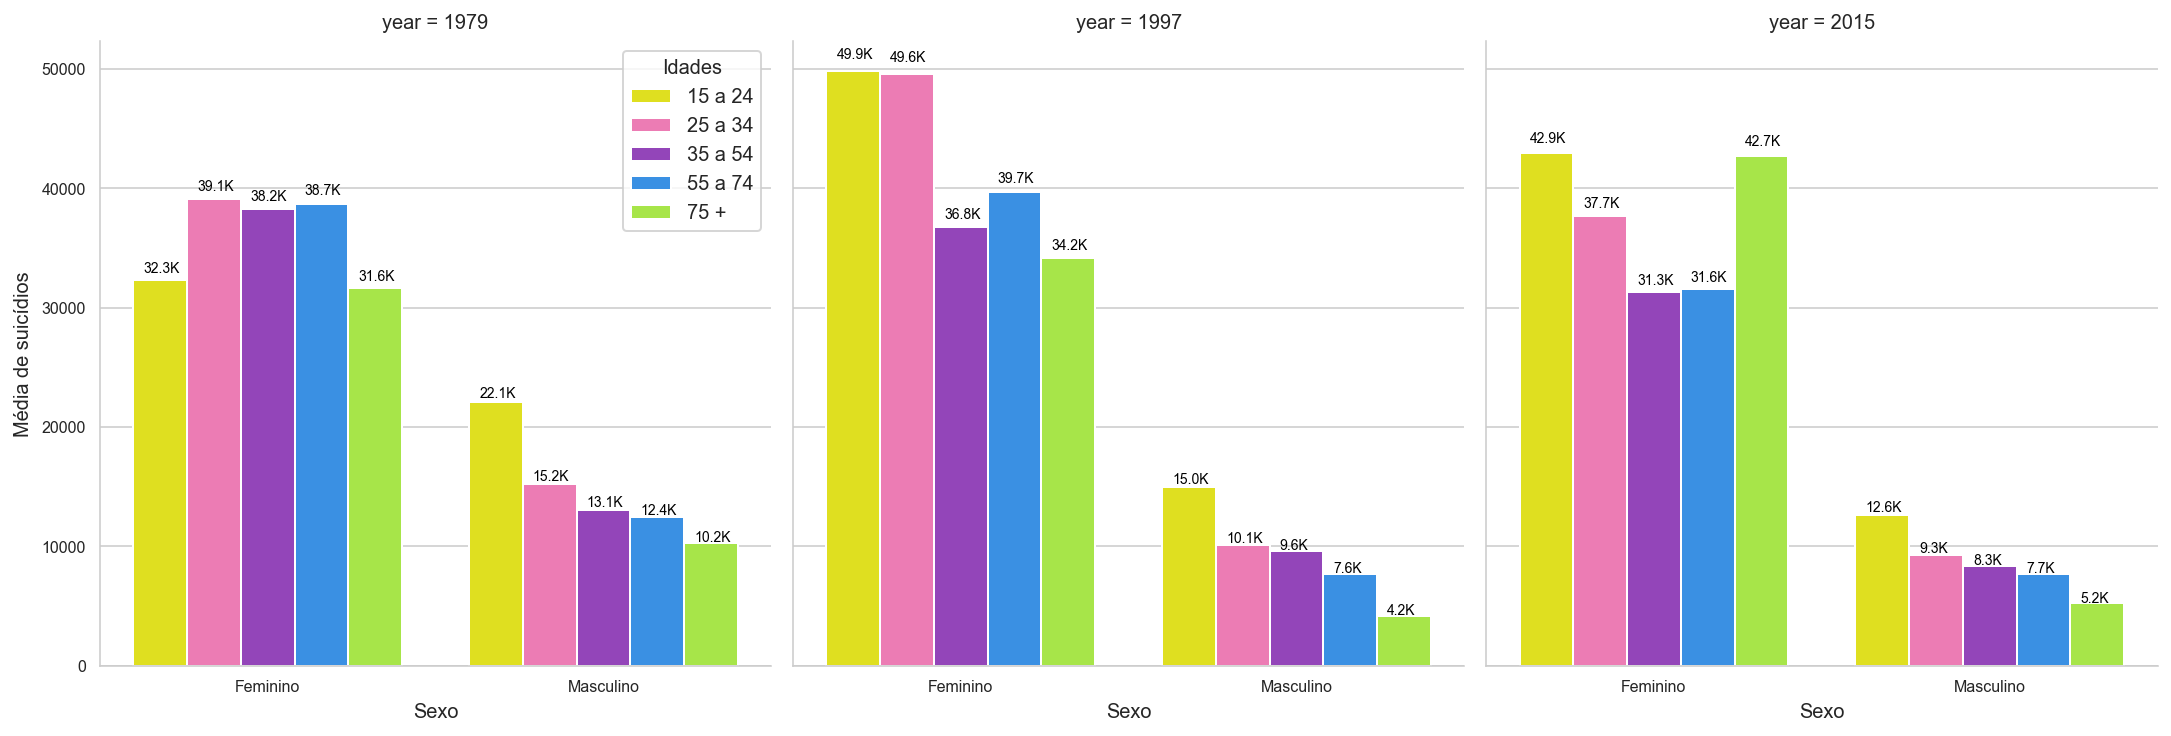

In [195]:
# Gráfico 3 (DESTACAR FAIXA ETÁRIA (20-40) E HOMENS BRANCOS NA HORA DE EXPLICAR)

sns.set_style('whitegrid')
ax= sns.catplot(x="sex", y="Média", hue="age", kind="bar",col="year",palette=[ "yellow", "hotpink", "darkorchid", "dodgerblue", "greenyellow"], col_wrap=3, data=tabelaTudo, legend_out= False)
#trocando rótulos
ax.set_axis_labels('Sexo', 'Média de suicídios')
ax.set_xticklabels(["Feminino", "Masculino"])
#legenda nova
leg = ax.axes.flat[0].get_legend()
new_title = 'Idades'
leg.set_title(new_title)
new_labels = ['15 a 24', '25 a 34', '35 a 54', '55 a 74', '75 +']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
#número em cima da barra
nm = ax.facet_axis(0, 0)
for p in nm.patches:
    nm.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),  
            color='black', 
            rotation='horizontal', 
            size=7)
nm = ax.facet_axis(0, 1)
for p in nm.patches:
    nm.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),  
            color='black', 
            rotation='horizontal', 
            size=7)
nm = ax.facet_axis(0, 2)
for p in nm.patches:
    nm.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),  
            color='black', 
            rotation='horizontal', 
            size=7,
            )

### Análise de óbtos por suicídio nos EUA em 

Importando os dados

In [63]:
# Gráfico 4

py.init_notebook_mode(connected=True)

df = pd.read_excel(r'./Data/Tabela 1.xlsx')
# Removendo as colunas desnecessários;
df = df.drop(columns=['Crude Rate','YPLL','Crude YPLL Rate','appliedFilters'])
# Removendo uma linha que não possui informações;
df = df.drop(8)
df
# Renomeando as colunas
df = df.rename(columns ={'Race': 'Raça', 'Sex':'Sexo','Number of Deaths': 'Número de mortes'})
df

,Raça,Sexo,Número de mortes
0,White,Males,"28,054"
1,White,Females,"8,152"
2,Black,Males,"2,511"
3,Black,Females,652
4,American Indian,Males,478
5,American Indian,Females,161
6,Asian/PI,Males,"1,064"
7,Asian/PI,Females,407


In [201]:
# Gráfico 5

df = pd.read_excel(r'./Data/Tabela 4.xlsx')

# Removendo as colunas desnecessários;
df = df.drop(columns=['Crude Rate','YPLL','YPLL Crude Rate','YPLL Calculated Year','appliedFilters'])

# Removendo uma linha que não possui informações;
df = df.drop(51)

# Troca dos nomes das colunas, pois 'Population' e 'Deaths' estavam trocados
df.rename(columns={'Population': 'Mortes'}, inplace = True)
df.rename(columns={'Deaths': 'População (de 12 a 70 anos)'}, inplace = True)

# Renomeando as outras colunas
df.rename(columns={'State Name': 'Estado','State FIPS': 'Código do Estado'}, inplace = True)
df.head(8)

,Estado,Código do Estado,Mortes,População (de 12 a 70 anos)
0,West Virginia,54.0,283.0,1332729.0
1,Florida,12.0,2828.0,15743268.0
2,Illinois,17.0,1279.0,9572818.0
3,Minnesota,27.0,757.0,4213394.0
4,Maryland,24.0,571.0,4571727.0
5,Rhode Island,44.0,112.0,810281.0
6,Idaho,16.0,309.0,1320225.0
7,New Hampshire,33.0,224.0,1045040.0


Gerando os gráficos 

In [196]:
# Gráfico 4

trace1 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'], # Denominação das raças segundo o IBGE
                y = [28054, 2511, 478, 1064],
                name = 'Homens',
                marker = {'color': 'blue'})

trace2 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'],
                y = [8152, 652, 161, 407],
                name = 'Mulheres',
                marker = {'color': 'deeppink',})

layout = go.Layout(title='Taxa de Suicídio por Raça e Sexo',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Tipo de raça'})

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [200]:
# Gráfico 5
nm_coluna_x = "Estado"
nm_coluna_y = "Mortes"

df_descendente = df.sort_values('Mortes', ascending=False)

fig = px.bar(
    df_descendente,
    x = nm_coluna_x,
    y = nm_coluna_y,
    color_discrete_sequence=["lightseagreen"], 
    height = 500,
    width = 1800
)
fig.update_layout(
    title = "Número de suicídios por estado em 2019, de 12 a 70 anos (EUA)",
    xaxis_title = "Estados",
    yaxis_title = "Quantidade de mortes",
    width = 1000
)

fig.show()